## 4.3 Verteilung Tumormarker

In [1]:
source("util.R")

## Einlesen der Daten
Der Datensatz mit 18561 Werten des Tumormarkers *Prostataspezifisches Antigen (PSA)* kann unter
https://www.ebi.ac.uk/biostudies/europepmc/studies/S-EPMC7807039  heruntergeladen werden. Der Einfachheit halber arbeiten wir hier mit einer lokalen Kopie 

In [2]:
psa <- read.csv("psa.csv", header = TRUE)
sprintf("Der Datensatz enthält %d Einträge von Männern im Alter von %d bis %d Jahren",
        nrow(psa),
        min(psa$Age),
        max(psa$Age))

[1] "Der Datensatz enthält 18561 Einträge von Männern im Alter von 20 bis 98 Jahren"

### Hilfsfunktionen zur Erstellung der Plots

In [3]:
psa_hist_plot <- function(data, hist_x_title) {
  ggplot(data, aes(x = PSA)) +
  geom_histogram(binwidth = 0.1, fill = "green", color = "black", alpha = 0.7) +
  xlab(hist_x_title) +
  ylab("Häufigkeit")
}

psa_qq_plot <- function(data, band_type) {
  ggplot(data, aes(sample = PSA)) +
  stat_qq_band(mapping = aes(fill = "red", alpha = 0.5), bandType= band_type, show.legend = FALSE) +
  stat_qq_point() +
  stat_qq_line() +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  xlab("Theoretische Quantile") +
  ylab("Empirische Quantile") 
}

hist_qqplot <- function(data, predicate, band_type = "ell", hist_x_title = "PSA Wert") {

  hist_plot <- psa_hist_plot(data, hist_x_title) + theme_jupyter()
  qq_plot <- psa_qq_plot(data, band_type) + theme_jupyter()

  hist_plot | qq_plot
}

### Filterung der Daten

Hilfsfunktionen

In [4]:
psa_predicate <- function(data, age_min, age_max, psa_max) {
  data$Age >= age_min & data$Age <= age_max & data$PSA < psa_max
}

psa_filter <- function(age_min, age_max, psa_max) {
  partial_func(psa_predicate, age_min = age_min, age_max = age_max, psa_max = psa_max)
}

Im Folgenden betrachten wir nur die Teilmenge der Männer im Alter zwischen 50 und 70 Jahren

In [5]:
AGE_LOW = 50
AGE_HIGH = 70

psa_subset <- subset(psa, psa_filter(AGE_LOW, AGE_HIGH, 6)(psa))
sprintf("Der Datensatz enthält %d Einträge von Männern im Alter von %d bis %d Jahren",
        nrow(psa_subset),
        AGE_LOW,
        AGE_HIGH)  

[1] "Der Datensatz enthält 8919 Einträge von Männern im Alter von 50 bis 70 Jahren"

## Histogramm & Q-Q Plot PSA Daten

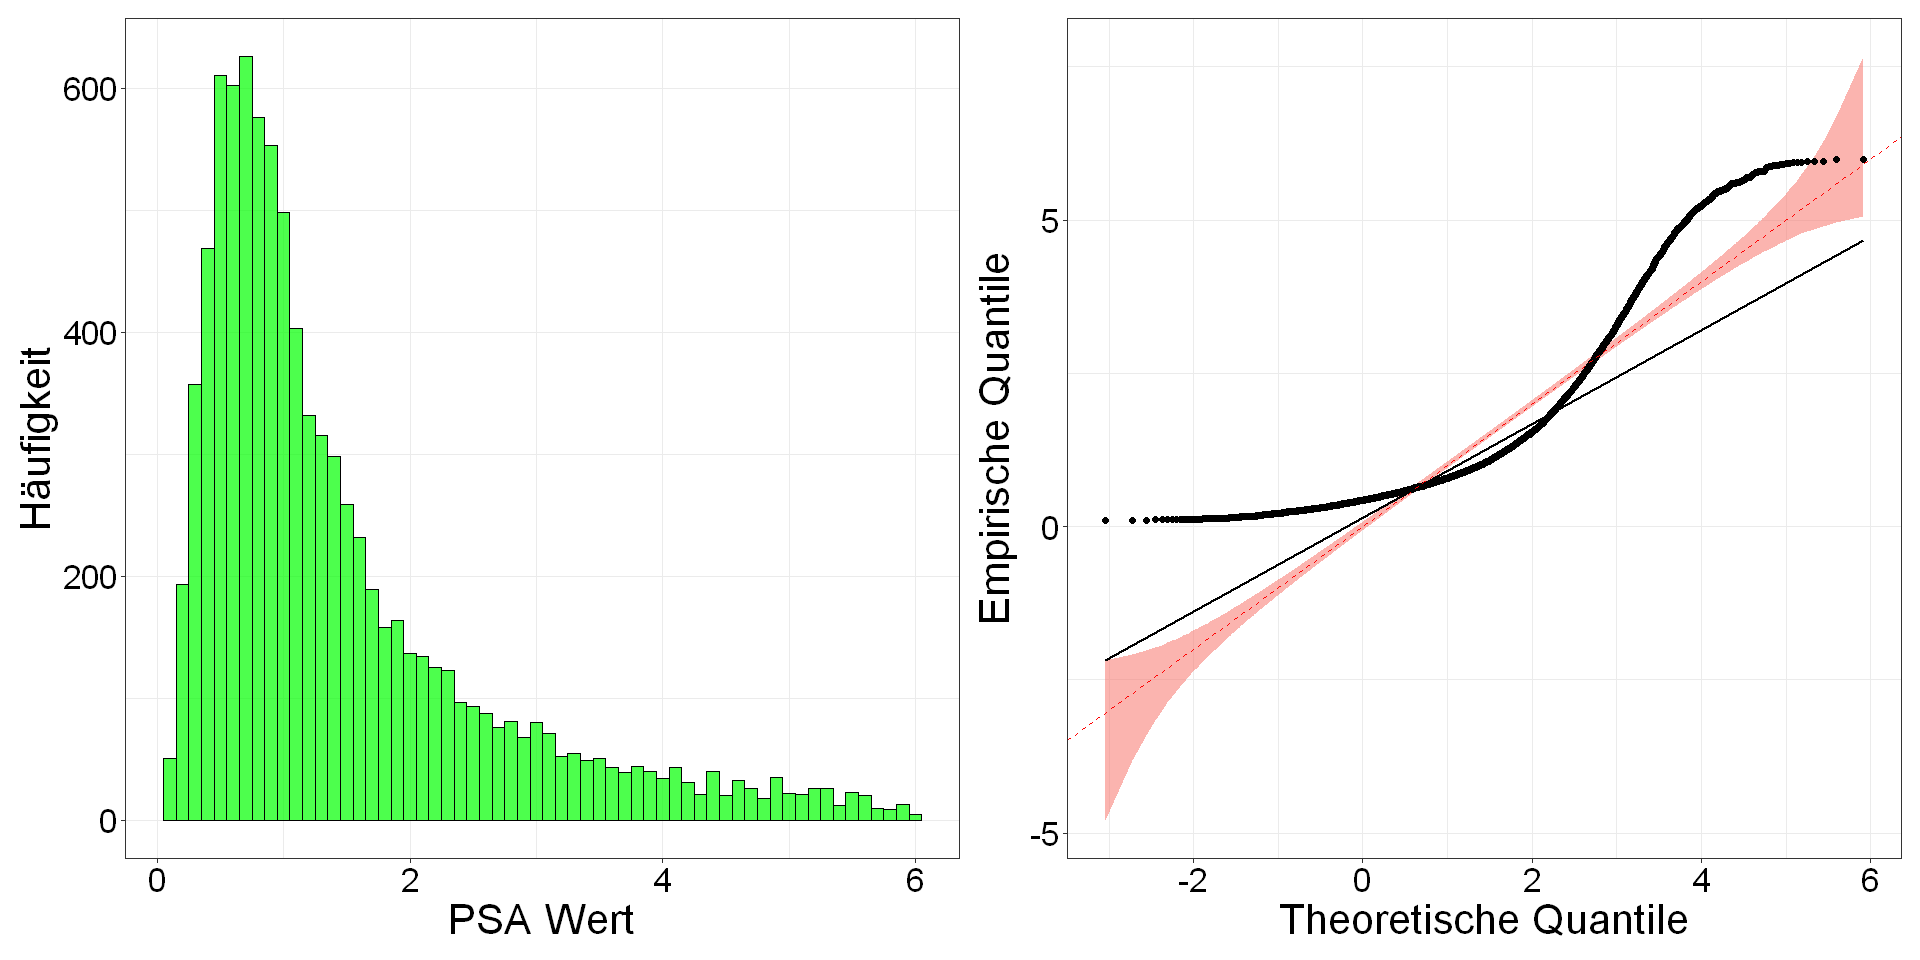

In [6]:
options(repr.plot.width=16, repr.plot.height=8)

psa_plot <- hist_qqplot(psa_subset, band_type = "ell", hist_x_title = "PSA Wert")
print(psa_plot)

## Logarithmierung Daten

In [7]:
log_psa <- data.frame(Age = psa$Age, PSA = log(psa$PSA))
log_psa_subset <- subset(log_psa, psa_filter(AGE_LOW, AGE_HIGH, 4)(log_psa))

## Histogramm & Q-Q Plot logarithmierte PSA Daten

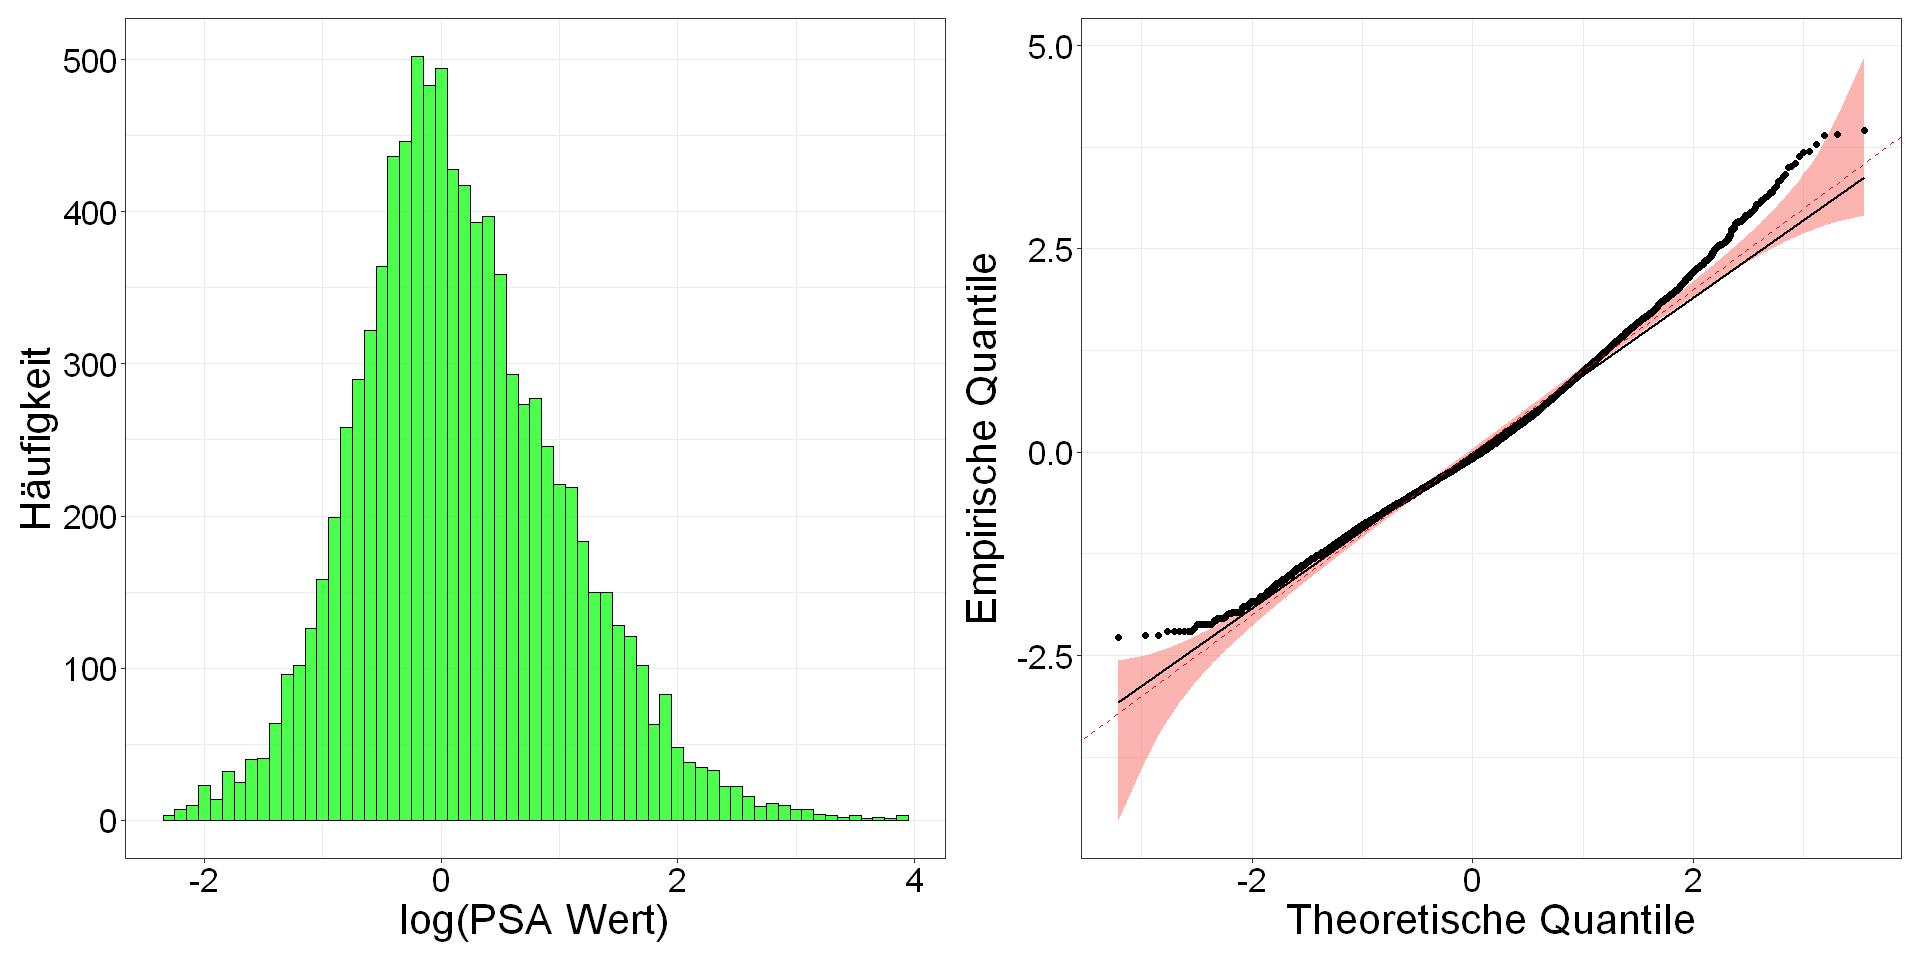

In [8]:
log_psa_plot <- hist_qqplot(log_psa_subset, band_type = "ell", hist_x_title = "log(PSA Wert)")
print(log_psa_plot)

## Q-Q Plot mit Kolmogorov-Smirnov Konfidenzbändern

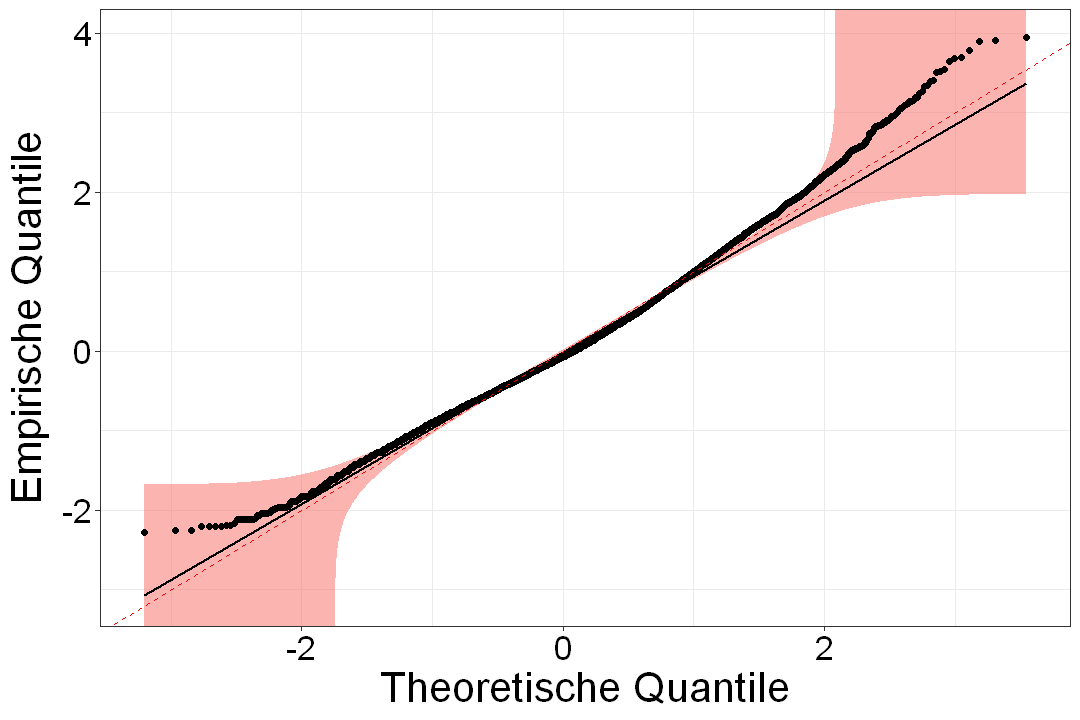

In [9]:
options(repr.plot.width=9, repr.plot.height=6)

log_psa_qqplot_ks <- psa_qq_plot(log_psa_subset, "ks") + theme_jupyter()
print(log_psa_qqplot_ks)